# Carrington

In [15]:
import bz2
from pathlib import Path

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = []
for file in Path('data/L1').glob('*.fts.bz2'):
    decompressed_file = bz2.BZ2File(file)
    with fits.open(decompressed_file) as hdul:
        data.append(hdul[0].data)

In [17]:
carrington = data[0][:, 1000:1001]
for image in data[1:]:
    carrington = np.hstack((carrington, image[:,1000:1001]))

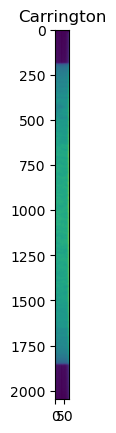

In [18]:
plt.figure()
plt.imshow(carrington);
plt.title('Carrington');